<a href="https://colab.research.google.com/github/kinjal30/ECG-Terminal-Analysis/blob/main/Kinjal_ECG_Terminal_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### KINJAL KESHRI

Reading the CSV File

In [ ]:
import pandas as pd

ECG_Data = pd.read_csv("ECG_hw1.csv")

ECG_Data.head()

,ECG,Time
0,-86.943,0
1,-86.673,1
2,-94.761,2
3,-94.761,3
4,-94.492,4


The data consist of 1000Hz recorder mV signal from Lead I config ECG Machine.
For this we have to import a library from python which is known as "ECG-PLOT"

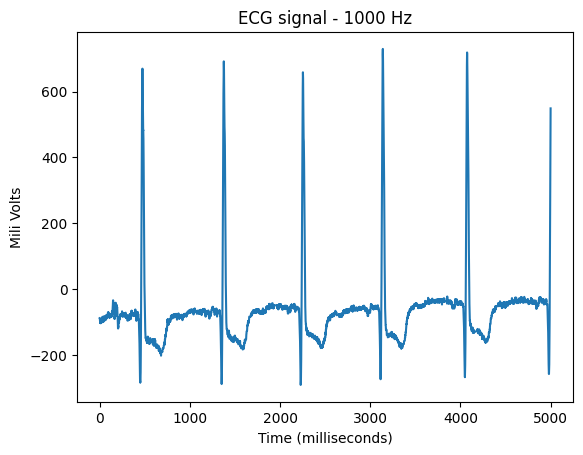

In [ ]:
import matplotlib.pyplot as plt

plt.title("ECG signal - 1000 Hz")
plt.plot(ECG_Data.ECG[0:5000])
plt.xlabel('Time (milliseconds)')
plt.ylabel('Mili Volts')
plt.show()

The ECG signal displayed in the graph represents the electrical activity of the heart over time. Each peak in the signal corresponds to a specific phase of the cardiac cycle.

The horizontal axis represents time in milliseconds, while the vertical axis represents the electrical voltage in millivolts.

The uniform intervals between peaks suggest a regular heart rate, and the shape of the waveform reflects the typical pattern seen in an ECG, with distinct P-waves, QRS complexes, and T-waves corresponding to different phases of the cardiac cycle. Overall, the graph provides a visual representation of the electrical impulses generated by the heart.

(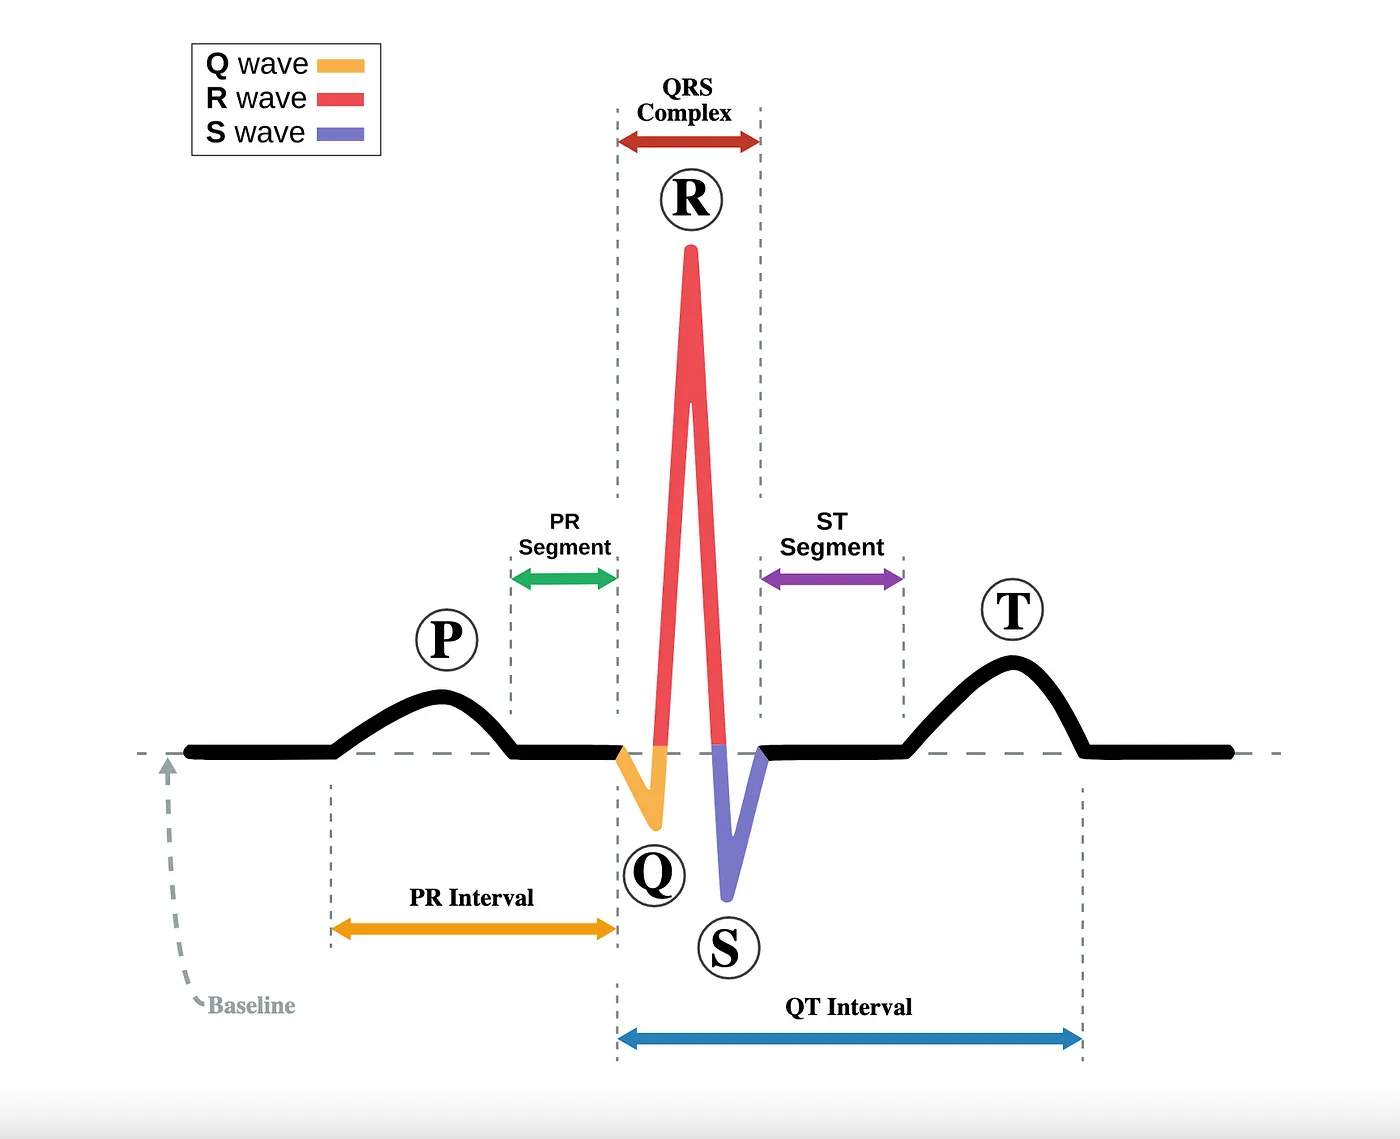)

Lets Analyse a Wave form for 1 Second

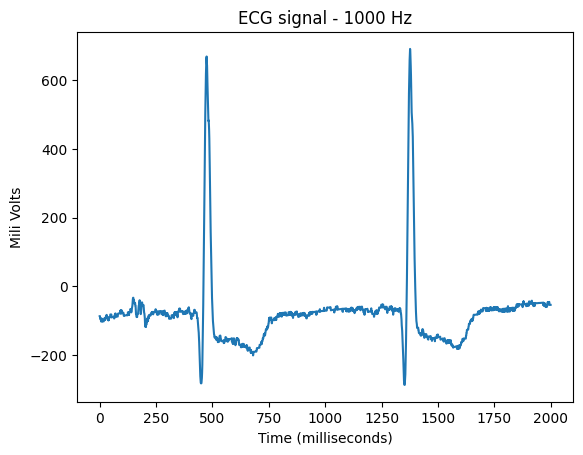

In [ ]:
import matplotlib.pyplot as plt

plt.title("ECG signal - 1000 Hz")
plt.plot(ECG_Data.ECG[0:2000])
plt.xlabel('Time (milliseconds)')
plt.ylabel('Mili Volts')
plt.show()

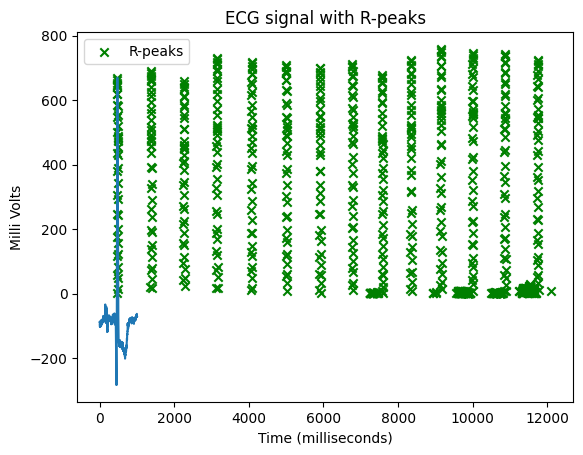

In [ ]:

threshold = 0.9

r_peaks = ECG_Data[ECG_Data.ECG > threshold]

plt.plot(ECG_Data.ECG[0:1000])
plt.scatter(r_peaks.index[0:1000], r_peaks.ECG[0:1000], c='green', marker='x', label='R-peaks')
plt.title("ECG signal with R-peaks")
plt.xlabel('Time (milliseconds)')
plt.ylabel('Milli Volts')
plt.legend()
plt.show()

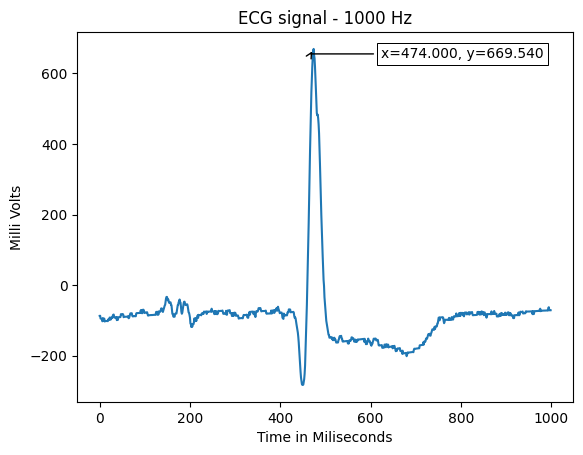

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def annot_max(x, y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text = "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax = plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops = dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data', textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94, 0.96), **kw)

x_values = np.arange(0,1000)
y_values = ECG_Data.ECG.values

plt.title("ECG signal - 1000 Hz")
plt.plot(x_values, y_values[0:1000])
plt.xlabel('Time in Miliseconds')
plt.ylabel('Milli Volts')

annot_max(x_values[0:1000], y_values[0:1000])

plt.show()


First second heart peak (r peak ) is at 474.00 Ms

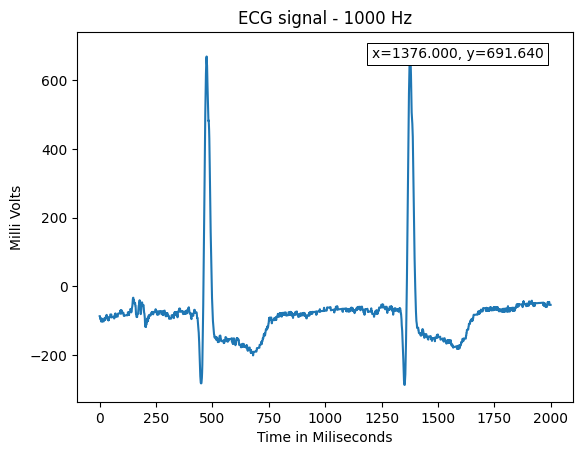

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def annot_max(x, y, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text = "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax = plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops = dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data', textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94, 0.96), **kw)

x_values = np.arange(0,2000)
y_values = ECG_Data.ECG.values

plt.title("ECG signal - 1000 Hz")
plt.plot(x_values, y_values[0:2000])
plt.xlabel('Time in Miliseconds')
plt.ylabel('Milli Volts')

annot_max(x_values[0:2000], y_values[0:2000])

plt.show()


Second second heart peak (r peak ) is at 1376.00 Ms

r-r peak = Heart period = 1376.0 - 474.0 = 0.902 Ms


ECG Magnitude = Highest - Lowest /2

In [ ]:
ymax =max(ECG_Data.ECG)
print(ymax)
ymin = min(ECG_Data.ECG)
print(ymin)
ECG_MAG = (ymax-ymin)/2
print(f"ECG MAG is {ECG_MAG} ")

1892.1
-945.87
ECG MAG is 1418.985 


In [ ]:
threshold = 0.9
beats = ECG_Data[ECG_Data['ECG'] > threshold]
print(beats)
beats.to_csv("beat_occurrences.csv", columns=['Time','ECG'], index=False)

# beat_occurrences.head()
heart_periods = np.diff(beats['Time'])
print(heart_periods)

             ECG    Time
460       1.4838     460
461      59.1770     461
462     116.6000     462
463     175.1000     463
464     248.4300     464
...          ...     ...
559988   34.9130  559988
559989   32.7570  559989
559990   27.3650  559990
559991   19.2770  559991
559992    4.1797  559992

[249454 rows x 2 columns]
[1 1 1 ... 1 1 1]


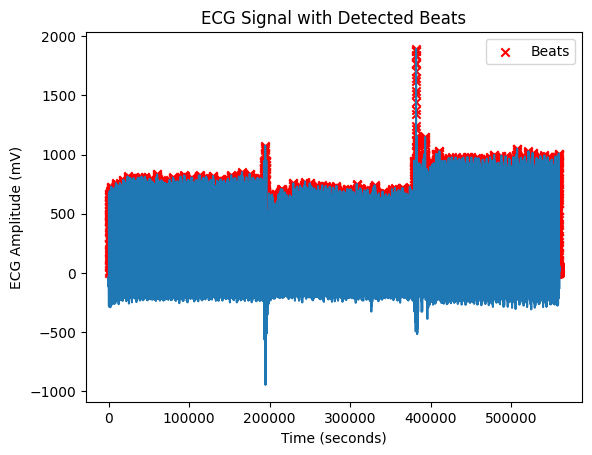

In [ ]:
# Plotting [Time, ECG amplitude]
plt.plot(ECG_Data['Time'], ECG_Data['ECG'])
plt.scatter(beats['Time'], beats['ECG'], c='red', marker='x', label='Beats')
plt.title('ECG Signal with Detected Beats')
plt.xlabel('Time (seconds)')
plt.ylabel('ECG Amplitude (mV)')
plt.legend()
plt.show()

          ECG   Time
0     -86.943      0
1     -86.673      1
2     -94.761      2
3     -94.761      3
4     -94.492      4
...       ...    ...
29995 -61.332  29995
29996 -69.150  29996
29997 -69.959  29997
29998 -70.228  29998
29999 -61.871  29999

[30000 rows x 2 columns]


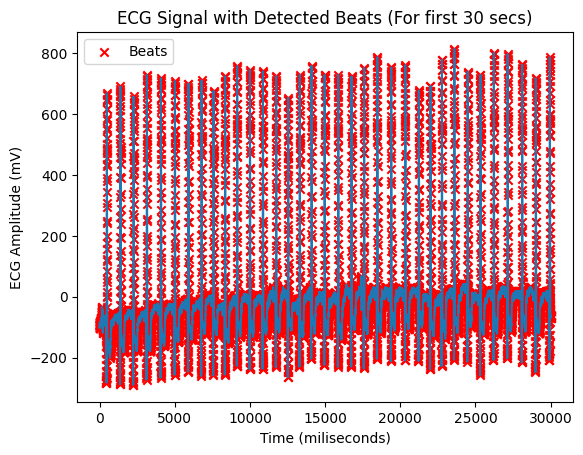

In [ ]:
beats = ECG_Data[ECG_Data['Time'] < 30000]
print(beats)
beats.to_csv("beat_occurrences.csv", columns=['Time','ECG'], index=False)

# Plot [Time, ECG amplitude] for the first 5000 rows
plt.plot(ECG_Data['Time'][:30000], ECG_Data['ECG'][:30000])
plt.scatter(beats['Time'][:30000], beats['ECG'][:30000], c='red', marker='x', label='Beats')
plt.title('ECG Signal with Detected Beats (For first 30 secs)')
plt.xlabel('Time (miliseconds)')
plt.ylabel('ECG Amplitude (mV)')
plt.legend()
plt.show()


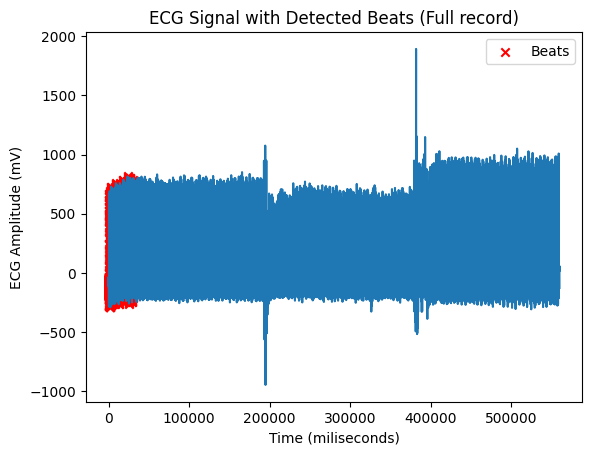

In [ ]:
# Plot [Time, ECG amplitude] for the first 5000 rows
plt.plot(ECG_Data['Time'][:], ECG_Data['ECG'][:])
plt.scatter(beats['Time'][:], beats['ECG'][:], c='red', marker='x', label='Beats')
plt.title('ECG Signal with Detected Beats (Full record)')
plt.xlabel('Time (miliseconds)')
plt.ylabel('ECG Amplitude (mV)')
plt.legend()
plt.show()


          ECG   Time
0     -86.943      0
1     -86.673      1
2     -94.761      2
3     -94.761      3
4     -94.492      4
...       ...    ...
29995 -61.332  29995
29996 -69.150  29996
29997 -69.959  29997
29998 -70.228  29998
29999 -61.871  29999

[30000 rows x 2 columns]


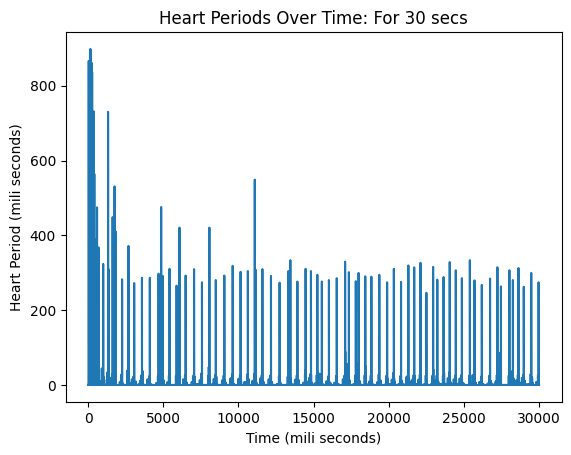

In [ ]:
beats = ECG_Data[ECG_Data['Time'] < 30000]
print(beats)
beats.to_csv("beat_occurrences.csv", columns=['Time','ECG'], index=False)

# Plot [Time, heart period]
plt.plot(beats['Time'][1:30000], heart_periods[1:30000])
plt.title('Heart Periods Over Time: For 30 secs')
plt.xlabel('Time (mili seconds)')
plt.ylabel('Heart Period (mili seconds)')
plt.show()


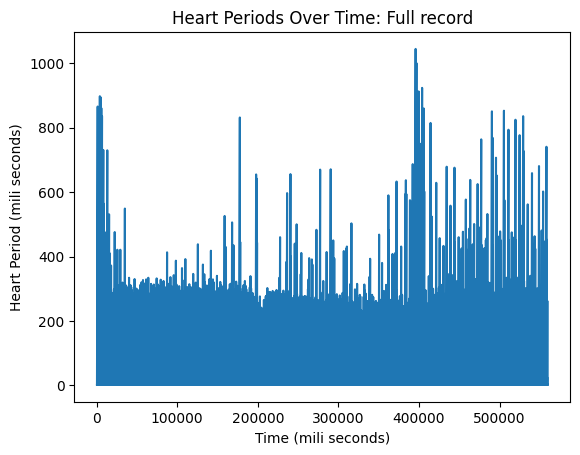

In [ ]:
# Plot [Time, heart period]
plt.plot(beats['Time'][1:], heart_periods[:])
plt.title('Heart Periods Over Time: Full record')
plt.xlabel('Time (mili seconds)')
plt.ylabel('Heart Period (mili seconds)')
plt.show()


In [ ]:
heart_rate_bpm = 60/np.mean(heart_periods)
print(f"Heart Rate: {heart_rate_bpm:.2f} beats per minute")

Heart Rate: 26.75 beats per minute



The graph reveals a non-uniform and increasing heart rate over time, suggesting that the subject is likely engaging in physical activity. The variability in heart rate indicates dynamic changes, possibly associated with the intensity or duration of the activity. This observation aligns with the common physiological response to exercise, where the heart rate tends to elevate during physical exertion.